Visualisation of house pricing and implementation of linear regression to predict property price

https://www.kaggle.com/riteshdash/linear-regression-numpy-pandas-sklearn-matplotlib

In [1]:
# Used for importing and storing the dataset
import pandas as pd


Initially the CSV file containing the housing data has been imported, with the first 5 rows displayed

In [2]:
df = pd.read_csv("G:\My Projects\housing data\kc_house_data.csv")

In [3]:
print(df.head(5))

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955 

20 different variables contained in the data set + index

The Date column seems to have a strange format, whereby each date is suffixed with T000000, this formatting will need to be modified.

In [5]:
df['date'] = df['date'].map(lambda x: x.rstrip('T000000'))

In [6]:
print(df.head())

           id      date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  20141013  221900.0         3       1.00         1180      5650   
1  6414100192  20141209  538000.0         3       2.25         2570      7242   
2  5631500400  20150225  180000.0         2       1.00          770     10000   
3  2487200875  20141209  604000.0         4       3.00         1960      5000   
4  1954400510  20150218  510000.0         3       2.00         1680      8080   

   floors  waterfront  view     ...      grade  sqft_above  sqft_basement  \
0     1.0           0     0     ...          7        1180              0   
1     2.0           0     0     ...          7        2170            400   
2     1.0           0     0     ...          6         770              0   
3     1.0           0     0     ...          7        1050            910   
4     1.0           0     0     ...          8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [7]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


no null values contained within the data set, no need for filling null values or removing samples with inadequate features

In [8]:
print("most recent date")
print(df['date'].max())
print("least recent date")
print(df['date'].min())

most recent date
20150527
least recent date
20140502


dates span just over one year, unlikely that larger differences in price are down to the date. Column will be disregarded for further analysis

In [9]:
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


All integer data types must be converted into a float data type for feature normalisation later

In [10]:
df = df.astype('float64')

In [11]:
print(df.dtypes)

id               float64
date             float64
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object


Initial regression model has been built based soley on the feature of Square Foot Living space

Dataframe including the target and feature is created and split into a training and test split

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

sqft_livingDF = df[['price', 'sqft_living']]

train, test = train_test_split(sqft_livingDF, test_size = 0.2)

X = train[['sqft_living']].values
Y = train[['price']].values

X_test = test[['sqft_living']].values
Y_test = test[['price']].values

Linear regression model is fit to the data

In [13]:
lr = LinearRegression()

lr.fit(X,Y)

prediction = lr.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

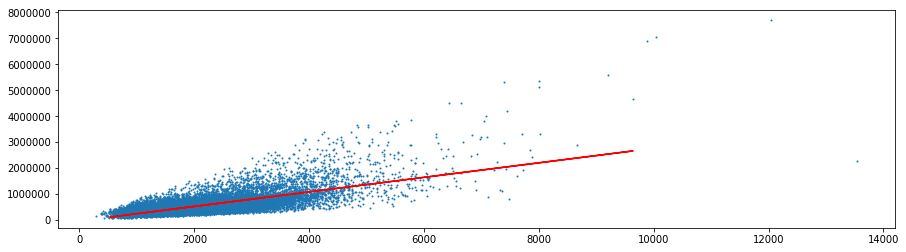

Mean Absolute Error: 
168716.9591645889
r2_score: 
0.5166140061610587
Coeffecient of Determination
0.487075208538586


In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

x = df['sqft_living']
y = df['price']
plt.figure(figsize = (15,4))
plt.scatter(x,y, s=1)
plt.plot(X_test, prediction, color = "r")
plt.xlabel = ["time"]
plt.ylabel = ["micro grams N02 per cubic metre "]
plt.show()

mae = mean_absolute_error(Y_test, prediction)
r2 = r2_score(Y_test, prediction)
cod = lr.score(X,Y)

print("Mean Absolute Error: ")
print(mae)
print("r2_score: ")
print(r2)
print("Coeffecient of Determination")
print(cod)

Whilst a clear correlation in price and size of living space is apparent, the model is far from accurate, especially towards the extremes of house pricing. With a model employing a larger number of features it maybe possible to build more accurate models.

In order to effectively incorporate multiple features into the analysis, feature values must be normalised so they have equal weighting in the building of models.

In [17]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

scaler = MinMaxScaler(feature_range =(0,1))
values = df.values
scaled_val = scaler.fit_transform(values)#

scaled_df = pd.DataFrame(scaled_val, columns = df.columns)
scaled_df['price'] = df['price']

In [18]:
print(scaled_df.head())


         id      date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  0.720103  0.999475  221900.0  0.090909    0.12500     0.067170  0.003108   
1  0.647853  0.999486  538000.0  0.090909    0.28125     0.172075  0.004072   
2  0.568795  0.999983  180000.0  0.060606    0.12500     0.036226  0.005743   
3  0.251157  0.999486  604000.0  0.121212    0.37500     0.126038  0.002714   
4  0.197333  0.999983  510000.0  0.090909    0.25000     0.104906  0.004579   

   floors  waterfront  view     ...         grade  sqft_above  sqft_basement  \
0     0.0         0.0   0.0     ...      0.500000    0.097588       0.000000   
1     0.4         0.0   0.0     ...      0.500000    0.206140       0.082988   
2     0.0         0.0   0.0     ...      0.416667    0.052632       0.000000   
3     0.0         0.0   0.0     ...      0.500000    0.083333       0.188797   
4     0.0         0.0   0.0     ...      0.583333    0.152412       0.000000   

   yr_built  yr_renovated   zipcode       la

now that the dataframe values have been normalised, a number of features maybe selected to be inputted into the linear regression model.

Features selects:
- Bedrooms
- Bathrooms
- SQFT_Living
- SQFT_lot

In [19]:
multiDF = scaled_df[["price","bedrooms", "bathrooms", "sqft_living", "sqft_lot"]]

In [20]:


train,test = train_test_split(multiDF, test_size = 0.2)

X = train[["bedrooms", "bathrooms", "sqft_living", "sqft_lot"]].values
Y = train[["price"]].values

X_test = test[["bedrooms", "bathrooms", "sqft_living", "sqft_lot"]].values
Y_test = test[["price"]].values



In [21]:
mlr = LinearRegression()

mlr.fit(X,Y)
print(mlr.coef_)
prediction = mlr.predict(X_test)


[[-2083037.72343529    79120.97240168  4130051.19757091  -798204.52569953]]


In [23]:


mae = mean_absolute_error(Y_test, prediction)
r2 = r2_score(Y_test, prediction)
cod = mlr.score(X,Y)

print("Mean Absolute Error: ")
print(mae)
print("r2_score: ")
print(r2)
print("Coeffecient of Determination")
print(cod)

Mean Absolute Error: 
166423.4480405749
r2_score: 
0.5117765438523927
Coeffecient of Determination
0.5074864756388


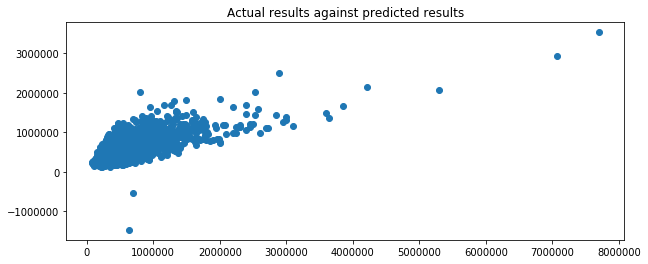

In [34]:
plt.figure(figsize = (10,4))
plt.title('Actual results against predicted results')
plt.scatter(Y_test, prediction)

plt.show()


Observing the graph displaying predicted vs actual pricing, it can be seen that the model has been able to somewhat accurately predict housing prices, especially in the lower priced houses. However as with the model employing living space as the sole feature the model fails to make accurate predictions for more expensive properties, with houses in general being massively undervalued by the model.

Other interesting results show up in the form of negative predicted valuations. It seems that the models negative coeffecient for the number of bedrooms in the house has led to some strange results.

Why the model gives a negative coeffecient to number of bedrooms and land size is unclear. It maybe that more prestigous properties often have a smaller number of bedrooms of greater size. 

The location of properties is also not taken into account in the building of the model, as zipcode alone gives little reference to the type of area that the property is in, however with the large difference in prices seen in the housing market due to location, it may be that this missing important factor has reduced the Linear regression model's ability to predict a properties value